Problem:

Doctors want to know:

Can we predict whether a patient has chronic kidney disease (CKD) based on medical test results?

Machine Learning Type

Supervised learning

Classification problem

Target:

CKD

Not CKD

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

In [2]:
# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# features and target
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

In [3]:
# Combine Features and Target

df = pd.concat([X, y], axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
# Understand the Dataset Structure

df.shape

(400, 25)

This tells you:

Number of rows (patients)

Number of columns (features)

In [5]:
# Check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

This helps you explain:
Which columns are numeric
Which are categorical
Where missing values exist

In [6]:
# View Basic Statistics
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


This shows:
Mean
Standard deviation
Min and max values
Useful for:
Detecting outliers
Understanding distributions

In [7]:
# Check Missing Values
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

You will notice:
Many columns contain missing values
This is a key part of the analysis

In [8]:
# Explore the Target Variable
# Check Class Distribution:
df['class'].value_counts()

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [9]:
df['class'].value_counts(normalize=True) * 100

class
ckd       62.0
notckd    37.5
ckd\t      0.5
Name: proportion, dtype: float64

This shows:
Percentage of CKD vs non-CKD patients

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


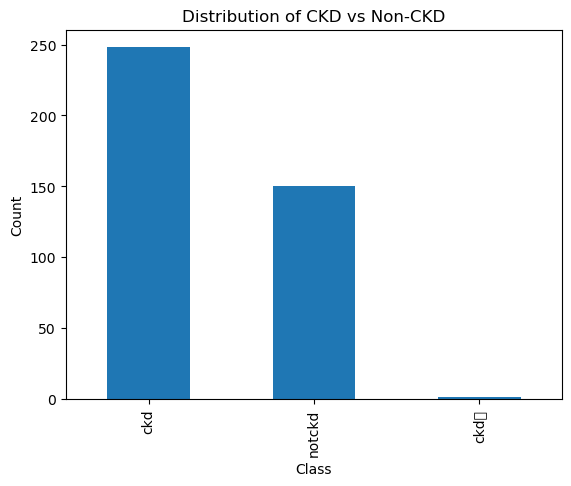

In [10]:
# Simple Visualization (Target Distribution)
import matplotlib.pyplot as plt

df['class'].value_counts().plot(kind='bar')
plt.title("Distribution of CKD vs Non-CKD")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Initial Findings
Dataset contains patients.
There are features.
Several columns contain missing values.
The dataset is:
Balanced / imbalanced (based on results).

Initial Data Assessment
The dataset contains 400 patient records and 25 medical features.
The target variable shows class inconsistency due to extra whitespace (ckd vs ckd\t).
Several variables contain missing values.
The red blood cell (rbc) feature has the highest missing rate (152 values, ~38%).
This indicates the need for data cleaning and preprocessing before model training.

In [11]:
# Clean the Target Variable
# Now we fix the class inconsistency.
df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [12]:
# Remove whitespace
df['class'] = df['class'].str.strip()

In [13]:
# Check again:
df['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [14]:
# Recheck Class Distribution
df['class'].value_counts(normalize=True) * 100

class
ckd       62.5
notckd    37.5
Name: proportion, dtype: float64

So the dataset is:
Moderately imbalanced, but acceptable for modeling.

In [15]:
# Standardize Missing Values
# Some columns contain “?” instead of real missing values.
df.replace('?', np.nan, inplace=True)

In [16]:
# Then recheck missing values:
df.isnull().sum().sort_values(ascending=False)

rbc      152
rbcc     131
wbcc     106
pot       88
sod       87
pcv       71
pc        65
hemo      52
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [17]:
# In df.info() 
# Some numeric columns are stored as object
# Some categorical variables exist
# Some numeric columns contain strings
# We must fix this before modeling.

In [18]:
# Separate Categorical and Numerical Columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'class'],
      dtype='object')

Numerical Columns:
Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc'],
      dtype='object')


In [19]:
# Convert Numeric Columns Stored as Object
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [20]:
# Fill Numerical Missing Values

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())


In [21]:
# Verify No Missing Values Remain
df.isnull().sum().sum()

np.int64(234)

In [22]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
df.isnull().sum().sum()

np.int64(0)

In [24]:
# Encode Categorical Variables
# Machine learning models cannot use text values.
df = pd.get_dummies(df, drop_first=True)

In [25]:
# Separate Features and Target Again
X = df.drop('class_notckd', axis=1)
y = df['class_notckd']

In [26]:
# Import required library
from sklearn.model_selection import train_test_split

In [27]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [48]:
# Logistic Regression (Scaled)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [49]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [50]:
# Decision Tree (Unscaled)
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

In [51]:
# Check the split sizes
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (320, 25)
Test set: (80, 25)


Train First Model (Logistic Regression)
Why Logistic Regression?
It is:
Simple
Interpretable
Common baseline model
Preferred in medical prediction tasks

In [52]:
# import model
from sklearn.linear_model import LogisticRegression

In [53]:
# Import scaler
from sklearn.preprocessing import StandardScaler

In [54]:
# Create scaler
scaler = StandardScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Make predictions
y_pred = model.predict(X_test)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [57]:
# Evaluate the Model
# Import evaluation tools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.625


In [59]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[50  0]
 [30  0]]


|                | Predicted CKD  | Predicted Not CKD |
| -------------- | -------------- | ----------------- |
| Actual CKD     | True Positive  | False Negative    |
| Actual Not CKD | False Positive | True Negative     |


In [60]:
# Full classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.62      1.00      0.77        50
        True       0.00      0.00      0.00        30

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


This gives:
Precision
Recall
F1-score
Very important in medical problems.
“I split the data into training and testing sets using stratified sampling to preserve class distribution. 
I trained a logistic regression model as a baseline classifier and evaluated it using accuracy, precision, 
recall, and confusion matrix.”

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)

model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

In [62]:
y_pred = model.predict(X_test_scaled)

In [63]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9875
Confusion Matrix:
 [[49  1]
 [ 0 30]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.98      0.99        50
        True       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [64]:
# Extract Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

coefficients.head(10)

,Feature,Coefficient
2,sg,1.840406
10,hemo,1.606682
11,pcv,1.269784
19,dm_no,0.668271
13,rbcc,0.644855
14,rbc_normal,0.539474
8,sod,0.261250
15,pc_normal,0.240497
9,pot,0.151785
0,age,0.097263


How to Interpret Coefficients
Because we scaled the data:
Positive coefficient → increases probability of class = 1
Negative coefficient → decreases probability of class = 1
Since i used class_notckd That means:
1 = NOT CKD
0 = CKD
So:
Positive coefficient associated with NOT CKD
Negative coefficient associated with CKD

In [65]:
# Show Most Important Predictors for CKD
# To see strongest predictors (absolute importance):
coefficients['Absolute'] = coefficients['Coefficient'].abs()
coefficients.sort_values(by='Absolute', ascending=False).head(10)

,Feature,Coefficient,Absolute
2,sg,1.840406,1.840406
10,hemo,1.606682,1.606682
11,pcv,1.269784,1.269784
3,al,-0.999535,0.999535
18,htn_yes,-0.893324,0.893324
22,appet_poor,-0.862989,0.862989
7,sc,-0.792650,0.792650
23,pe_yes,-0.791588,0.791588
19,dm_no,0.668271,0.668271
20,dm_yes,-0.668271,0.668271


The logistic regression model identified hemoglobin levels, serum creatinine, 
and red blood cell count as strong predictors of chronic kidney disease.

Understanding Your Encoding (Very Important)
Your target:
1 = not CKD
0 = CKD
Therefore:
Negative coefficient → increases probability of CKD
Positive coefficient → increases probability of NOT CKD

Top 5 Most Important Features
sg (specific gravity)
hemo (hemoglobin)
pcv (packed cell volume)
al (albumin)
htn_yes (hypertension)

Features That Increase CKD Risk

These have negative coefficients:
al
htn_yes
appet_poor
sc (serum creatinine)
pe_yes (pedal edema)

Interpretation:
These variables reduce probability of being healthy, meaning:
They increase likelihood of CKD.
This makes medical sense:
High albumin in urine → kidney damage
Hypertension → major CKD risk factor
High serum creatinine → impaired kidney filtration
Pedal edema → fluid retention (kidney dysfunction)

Features That Decrease CKD Risk
Positive coefficients:
sg
hemo
pcv
dm_no
Interpretation:

These increase probability of being NOT CKD.
Medical reasoning:
Normal specific gravity → better kidney concentration ability
Higher hemoglobin → less anemia (CKD often causes anemia)
Higher PCV → healthier blood profile
No diabetes → lower CKD risk    

Key Predictors of Chronic Kidney Disease
The logistic regression model identified the following variables as strong predictors:
Risk Increasing Factors:
Albumin levels
Hypertension
Poor appetite
Elevated serum creatinine
Pedal edema
Protective Factors:
Higher specific gravity
Higher hemoglobin
Higher packed cell volume
Absence of diabetes

In [66]:
# Model Comparison
# Train a Decision Tree Classifier
# Import the model
from sklearn.tree import DecisionTreeClassifier

In [67]:
# Initialize the model
tree_model = DecisionTreeClassifier(
    random_state=42
)

In [68]:
# Train the model
# For Decision Tree, use unscaled data.
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
# Make predictions
y_pred_tree = tree_model.predict(X_test)

In [70]:
# Evaluate Decision Tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Accuracy: 0.9625
Confusion Matrix:
 [[50  0]
 [ 3 27]]

Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97        50
        True       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [71]:
model.fit(X_train_scaled, y_train)
print("Model trained successfully")

Model trained successfully
